## Data Ingetsion

In [4]:
# Installing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [6]:
data=pd.read_csv('/Users/nehadhananju/Desktop/DeepCSAT/data/raw/data.csv')

In [10]:
# Basic data info

print('Data shape:',data.shape)
print("\n==============================================\n")
print('Data Columns: ',data.columns)
print("\n==============================================\n")
print('Data types: ',data.dtypes)
print("\n==============================================\n")
print('First five rows: ',data.head())


Data shape: (85907, 20)


Data Columns:  Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


Data types:  Unique id                   object
channel_name                object
category                    object
Sub-category                object
Customer Remarks            object
Order_id                    object
order_date_time             object
Issue_reported at           object
issue_responded             object
Survey_response_Date        object
Customer_City               object
Product_category            object
Item_price                 float64
connected_handling_time    float64
Agent_name                  object
Supervisor         

In [15]:
# Checking for missing values 
print("Missing values:\n",data.isnull().sum())

Missing values:
 Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


In [17]:
# Checking for duplicate values
print("Duplicate values : ",data.duplicated().sum())

Duplicate values :  0


In [21]:
# Summary statics 

print("Numerical Features Summary:\n ",data.describe())
print("\n==============================================\n")
print("Categorical Feature Summary:\n ",data.describe(include=object))


Numerical Features Summary:
            Item_price  connected_handling_time    CSAT Score
count   17206.000000               242.000000  85907.000000
mean     5660.774846               462.400826      4.242157
std     12825.728411               246.295037      1.378903
min         0.000000                 0.000000      1.000000
25%       392.000000               293.000000      4.000000
50%       979.000000               427.000000      5.000000
75%      2699.750000               592.250000      5.000000
max    164999.000000              1986.000000      5.000000


Categorical Feature Summary:
                                     Unique id channel_name category  \
count                                  85907        85907    85907   
unique                                 85907            3       12   
top     7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Inbound  Returns   
freq                                       1        68142    44097   

                  Sub-category Customer Remark

## EDA

/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_18412/2204326148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CSAT Score', data=data , palette='viridis')


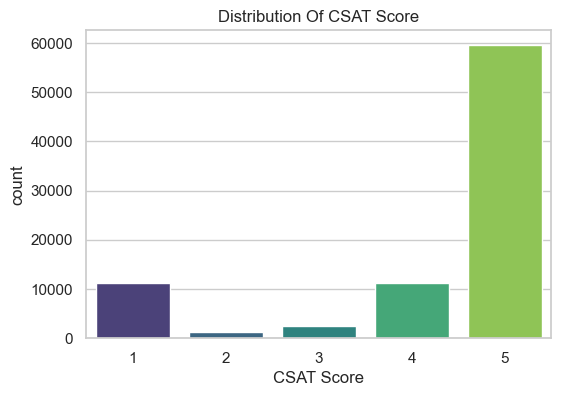

In [24]:
# Distribution of Target Variable (CSAT Score)
plt.figure(figsize=(6,4))
sns.countplot(x='CSAT Score', data=data , palette='viridis')
plt.title('Distribution Of CSAT Score')
plt.show()



/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_18412/2948547427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, palette='coolwarm', order=data[col].value_counts().index)


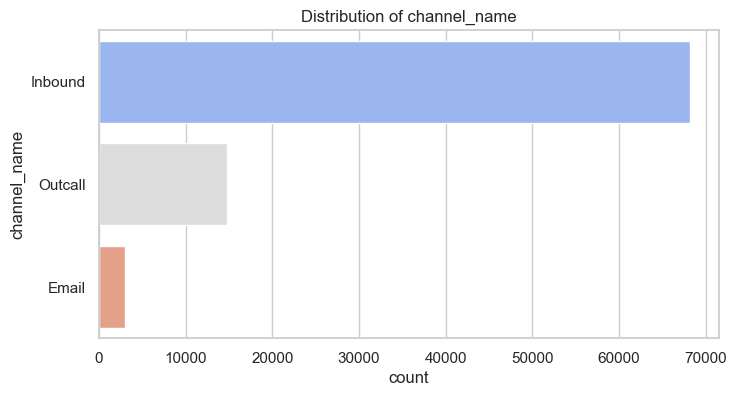

/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_18412/2948547427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, palette='coolwarm', order=data[col].value_counts().index)


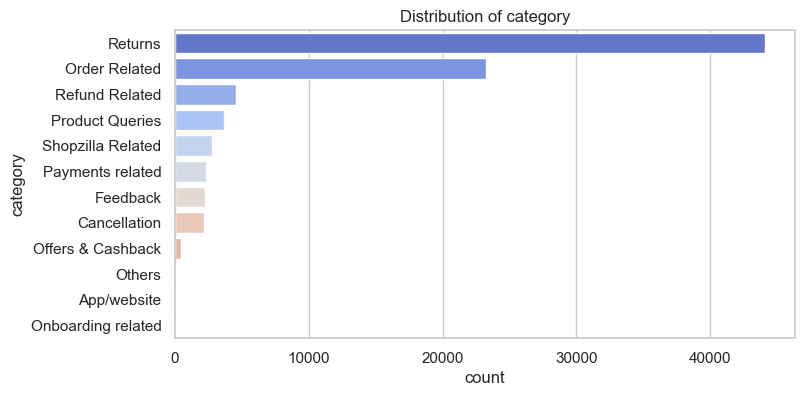

/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_18412/2948547427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, palette='coolwarm', order=data[col].value_counts().index)


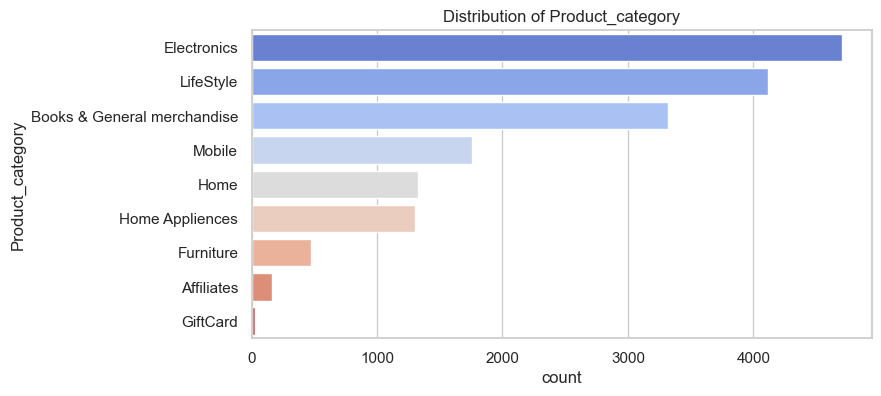

/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_18412/2948547427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, palette='coolwarm', order=data[col].value_counts().index)


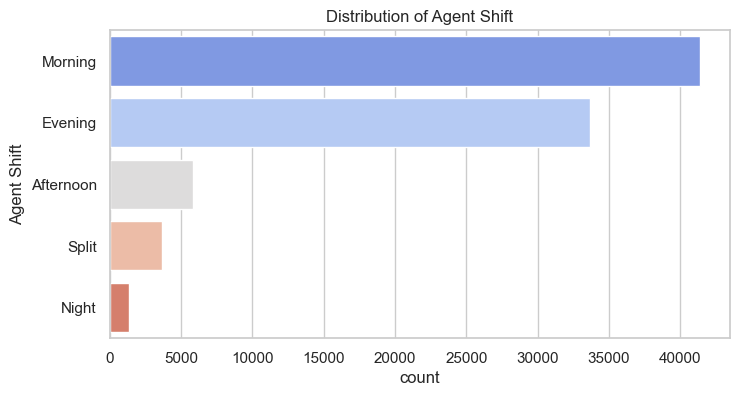

In [36]:
# Visualizing categorical Features
categorical_cols = ['channel_name', 'category' 
                    , 'Product_category', 'Agent Shift']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=data, palette='coolwarm', order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

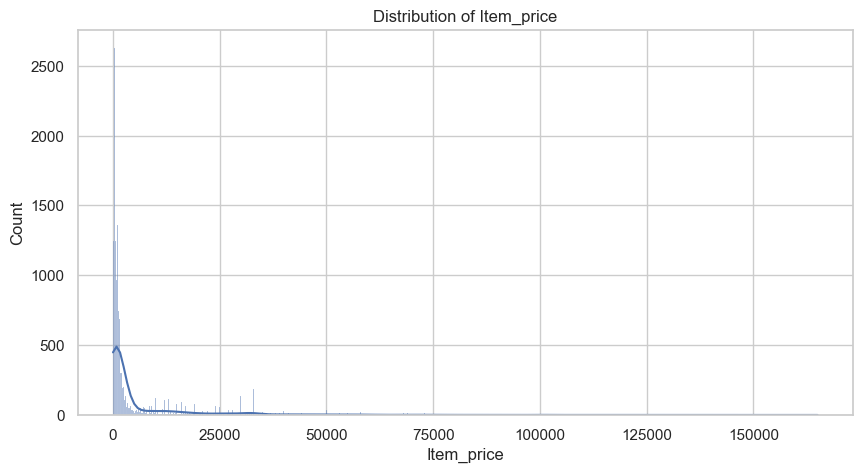

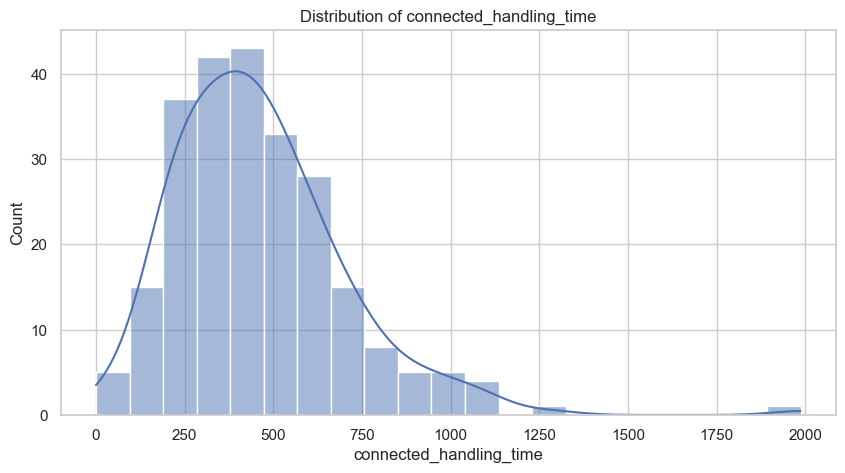

In [38]:
# Visualizing numerical features
numerical_cols=['Item_price','connected_handling_time']
for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data=data,x=col,kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [48]:
# Time based feature analysis
data['order_date_time']=pd.to_datetime(data['order_date_time'])
data['Issue_reported at']=pd.to_datetime(data['Issue_reported at'],dayfirst=True, errors='coerce')
data['issue_responded']=pd.to_datetime(data['issue_responded'],dayfirst=True, errors='coerce')
data['Survey_response_Date']=pd.to_datetime(data['Survey_response_Date'],dayfirst=True, errors='coerce')


/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_18412/595680547.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Survey_response_Date']=pd.to_datetime(data['Survey_response_Date'],dayfirst=True, errors='coerce')


In [50]:
# Calculate response time in hours
data['response_time_hours'] = (data['issue_responded'] - data['Issue_reported at']).dt.total_seconds() / 3600

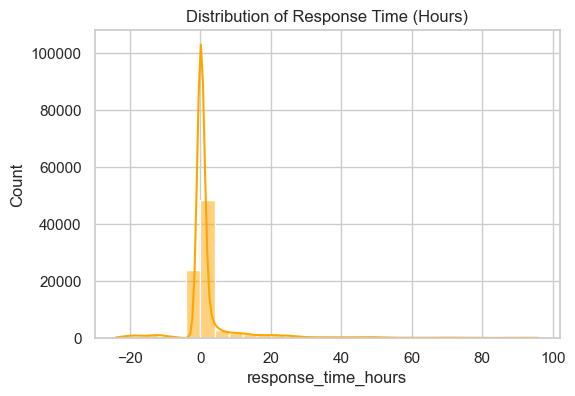

In [51]:
plt.figure(figsize=(6,4))
sns.histplot(data['response_time_hours'], bins=30, kde=True, color='orange')
plt.title('Distribution of Response Time (Hours)')
plt.show()


/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_18412/3509290904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CSAT Score', y='response_time_hours', data=data, palette='pastel')


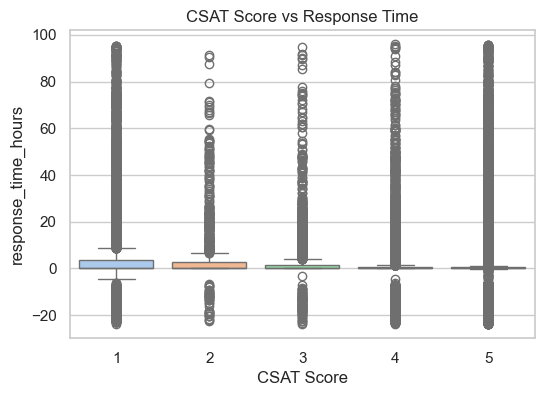

In [52]:
# CSAT vs Response Time
plt.figure(figsize=(6,4))
sns.boxplot(x='CSAT Score', y='response_time_hours', data=data, palette='pastel')
plt.title('CSAT Score vs Response Time')
plt.show()